In [88]:
from gurobipy import *
import numpy as np
import time

prueba = 1+2

# Problema 1

In [89]:
#Abrir un archivo excel
import pandas as pd

#como leer un archivo .csv
data = pd.read_csv('clientes2.csv', sep=';')
print(data)


            x         y   demanda
0      7,9744  -11,3045   147,199
1    -13,6786   -3,3825   161,327
2     -8,8032  -10,3279  172,4834
3    -15,3621    9,4144  133,8201
4     -9,0891   -7,9311  129,8221
..        ...       ...       ...
995   -6,2143    -10,86  155,4059
996  -11,7203   -2,1472  132,1921
997    6,4149    7,9825  126,1607
998    5,9054   12,7097  156,3924
999   -9,4583   -7,1544  141,3835

[1000 rows x 3 columns]


## Pre-procesamiento

In [90]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        valor = data.iloc[i,j]
        valor = valor.replace(",",".")
        data.iloc[i,j] = valor
data = data.applymap(float)

# data = data.iloc[0:100]
print(data)

           x        y   demanda
0     7.9744 -11.3045  147.1990
1   -13.6786  -3.3825  161.3270
2    -8.8032 -10.3279  172.4834
3   -15.3621   9.4144  133.8201
4    -9.0891  -7.9311  129.8221
..       ...      ...       ...
995  -6.2143 -10.8600  155.4059
996 -11.7203  -2.1472  132.1921
997   6.4149   7.9825  126.1607
998   5.9054  12.7097  156.3924
999  -9.4583  -7.1544  141.3835

[1000 rows x 3 columns]


### Pregunta 1

Programar una función que reciba un centro aleatorio (x,y) y un conjunto de datos de clientes con sus pesos. Definiendo como método de detención que la diferencia de coordenadas entre iteraciones no sea mayor que 1*10^-5. El algoritmo debe reportar la ubicación óprima, el tiempo de ejecución y el número de iteraciones realizadas para encontrar el óptimo

In [91]:
import random
import time

def centro_euclidiano(x=0, y=0, data=0, logs = True):
    
    data = data.reset_index(drop=True)
    
    x_new = x+1
    y_new = y+1

    x_i = data.iloc[:,0]
    y_i = data.iloc[:,1]
    pesos = data.iloc[:,2]
    contador = 0
    time_0 = time.time()
    while (abs(x-x_new)>0.00001 and abs(y-y_new)>0.00001):
        contador += 1
        sum = 0
        sum_new_x = 0
        sum_g_i = 0
        sum_new_y = 0
        for i in range(len(data)):
        
            distancia = ((x-float(x_i[i]))**2+(y-float(y_i[i]))**2)**(1/2)
            fx = float(pesos[i])*distancia
            sum += fx
            
            g_i= (pesos[i]/distancia)
            
            sum_new_x += (x_i[i]*g_i)
            sum_new_y += (y_i[i]*g_i)
            sum_g_i += g_i
            time_n = time.time()
            
        x, y = x_new, y_new
        x_new = sum_new_x/sum_g_i
        y_new = sum_new_y/sum_g_i
        tiempo = time_n-time_0
    if logs:
        print(f'El modelo de localización arrojó las coordenadas x: {x_new} y: {y_new}')
        print(f'El modelo se demoró un tiempo de {tiempo} segundos y {contador} iteraciones')
    return x_new, y_new, tiempo, contador


x=random.randint(-2,2)
y=random.randint(-2,2)
posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data)

    

El modelo de localización arrojó las coordenadas x: -2.1911251712076623 y: -4.507443893480918
El modelo se demoró un tiempo de 0.6566300392150879 segundos y 36 iteraciones


### Pregunta 1.2
Usando los datos de 'clientes2.csv' y tomando una muestra de 250 clientes al azar, realice 100 repeticiones del algoritmo partiendo desde distintos puntos aleatorios. Reporte los estadísticos básicos (media, desviación, gráfico box plot) para los tiempos de ejecución y número de iteraciones

In [92]:
import matplotlib.pyplot as plt

data_sample = data.sample(n=250)


max_value_x = round(data_sample.iloc[:,0].max())
min_value_x = round(data_sample.iloc[:,0].min())
max_value_y = round(data_sample.iloc[:,1].max())
min_value_y = round(data_sample.iloc[:,1].min())

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_sample, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]
    

fig, axes = plt.subplots(1,2,figsize=(5,5))

axes[0].boxplot(df_estadisticos['tiempo'])
axes[0].set_title('Boxplot de tiempo')
axes[0].set_ylabel('Tiempo (s)')

axes[1].boxplot(df_estadisticos['iteraciones'])
axes[1].set_title('Boxplot de iteraciones')
axes[1].set_ylabel('Iteraciones')

plt.tight_layout()

plt.show()

print(df_estadisticos.describe())
print(df_estadisticos)


KeyboardInterrupt: 

### Pregunta 1.3
Repita la parte 1.2 pero ahora usando distinta cantidad de clientes. Tome un subconjunto de los clientes del archivo y repita el experimento con los primeros 50, 100, 500, 1000 clientes de la base. Compare en un gráfico los distintos boxplot, tanto para los tiempos de ejecución como número de iteraciones. Explique el resultado

In [ ]:
# Preguntar si es que son LOS PRIMEROS o si es que hay que sacar una muestra al azar de tamaño 50, 100 o 500

data_50 = data.iloc[0:50]
data_100 = data.iloc[0:100]
data_500 = data.iloc[0:500]


###### Para los primeros 50 ######

max_value_x_50 = round(data_50.iloc[:,0].max())
min_value_x_50 = round(data_50.iloc[:,0].min())
max_value_y_50 = round(data_50.iloc[:,1].max())
min_value_y_50 = round(data_50.iloc[:,1].min())

df_estadisticos_50 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_50,max_value_x_50)
    y=random.randint(min_value_y_50,max_value_y_50)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_50, logs=False)
    df_estadisticos_50.loc[i] = [posx, posy, tiempo, iteraciones]

###### Para los primeros 100 ######

max_value_x_100 = round(data_100.iloc[:,0].max())
min_value_x_100 = round(data_100.iloc[:,0].min())
max_value_y_100 = round(data_100.iloc[:,1].max())
min_value_y_100 = round(data_100.iloc[:,1].min())

df_estadisticos_100 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_100,max_value_x_100)
    y=random.randint(min_value_y_100,max_value_y_100)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_100, logs=False)
    df_estadisticos_100.loc[i] = [posx, posy, tiempo, iteraciones]


###### Para los primeros 500 ######

max_value_x_500 = round(data_500.iloc[:,0].max())
min_value_x_500 = round(data_500.iloc[:,0].min())
max_value_y_500 = round(data_500.iloc[:,1].max())
min_value_y_500 = round(data_500.iloc[:,1].min())

df_estadisticos_500 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_500,max_value_x_500)
    y=random.randint(min_value_y_500,max_value_y_500)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_500, logs=False)
    df_estadisticos_500.loc[i] = [posx, posy, tiempo, iteraciones]
    
    
###### Para los primeros 1000 ######

max_value_x_1000 = round(data.iloc[:,0].max())
min_value_x_1000 = round(data.iloc[:,0].min())
max_value_y_1000 = round(data.iloc[:,1].max())
min_value_y_1000 = round(data.iloc[:,1].min())

df_estadisticos_1000 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data, logs=False)
    df_estadisticos_1000.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_50.describe(), df_estadisticos_100.describe(), df_estadisticos_500.describe(), df_estadisticos_1000.describe())


                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.262757   -6.729367    0.036086    38.430000
std      0.003135    0.000556    0.005446     5.017656
min     -3.290024   -6.730294    0.019053    20.000000
25%     -3.262624   -6.729474    0.033816    36.000000
50%     -3.262397   -6.729427    0.035805    38.500000
75%     -3.262203   -6.729372    0.037831    40.000000
max     -3.258745   -6.725307    0.064750    50.000000                 x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.986238   -5.045749    0.060202    32.680000
std      0.004927    0.002617    0.010090     5.098782
min     -4.012081   -5.058024    0.028797    16.000000
25%     -3.986428   -5.046077    0.055757    30.000000
50%     -3.986302   -5.046060    0.062105    34.000000
75%     -3.986144   -5.045947    0.065607    36.000000
max     -3.946420   -5.028867    0.095239    40.000000           

In [ ]:
print(data_50.describe(), '\n', data_100.describe(), '\n', data_500.describe(), '\n', data.describe())

               x          y     demanda
count  50.000000  50.000000   50.000000
mean   -1.175942  -4.911742  149.108546
std    10.069588   9.525324   26.757517
min   -15.362100 -18.073700  100.810500
25%    -9.701200 -11.819600  130.482700
50%    -5.417400  -8.166550  147.822350
75%     7.643625   1.209575  166.226875
max    14.676400  15.738300  211.439200 
                 x           y     demanda
count  100.000000  100.000000  100.000000
mean    -1.171814   -3.897002  149.750156
std      9.934664    9.149004   28.210610
min    -16.366900  -18.073700   90.171200
25%     -9.625725  -10.506300  130.080475
50%     -4.593350   -6.830850  147.822350
75%      7.521700    1.278500  170.862175
max     16.912300   15.738300  211.439200 
                 x           y     demanda
count  500.000000  500.000000  500.000000
mean     0.036199   -3.627976  149.941302
std     10.775372    8.973269   29.982003
min    -21.457700  -21.626700   65.764500
25%    -10.002200  -10.579075  128.735550
50%   

### Graficamos los resultados

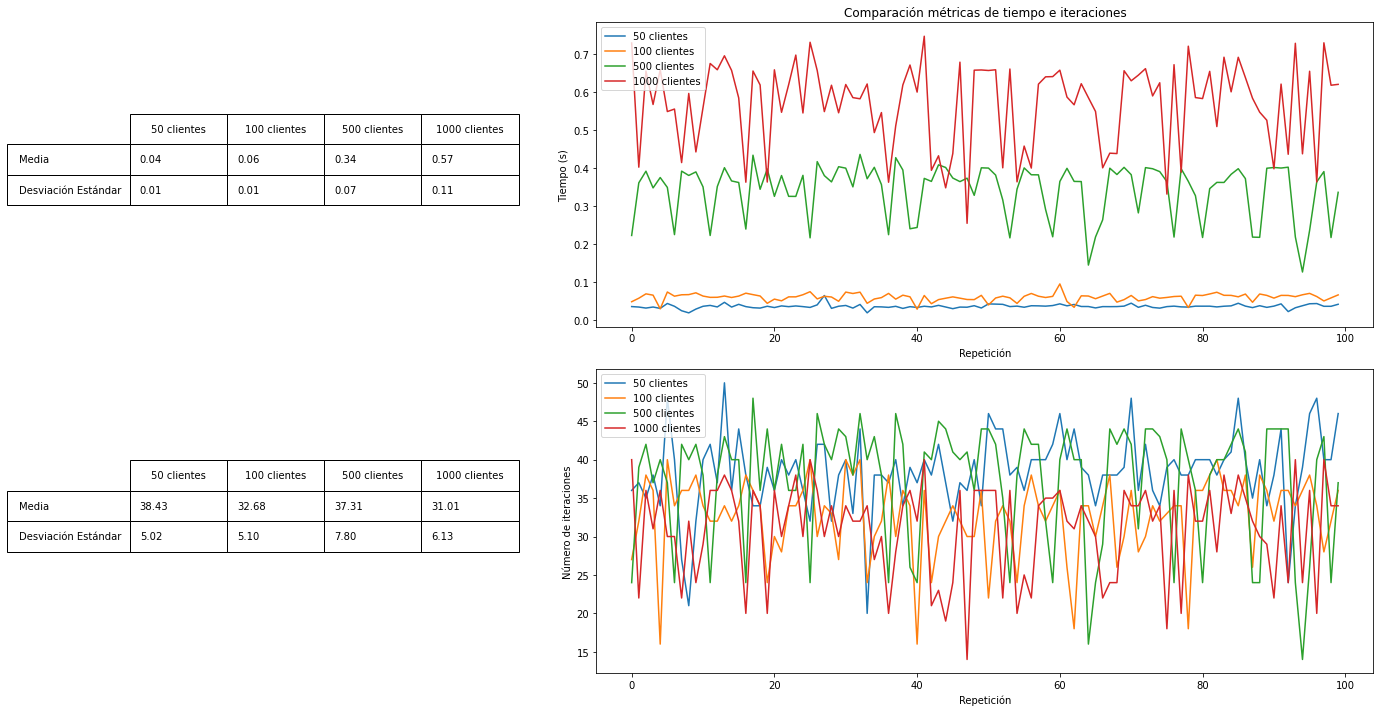

In [ ]:

###### Gráfico de comparaciones de tiempos ######

metricas_tiempo = {
    'Media': [df_estadisticos_50['tiempo'].mean(), df_estadisticos_100['tiempo'].mean(), df_estadisticos_500['tiempo'].mean(), df_estadisticos_1000['tiempo'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['tiempo'].std(), df_estadisticos_100['tiempo'].std(), df_estadisticos_500['tiempo'].std(), df_estadisticos_1000['tiempo'].std()],
}


fig, axes = plt.subplots(2,1,figsize=(20,10))

axes[0].plot(df_estadisticos_50['tiempo'], label='50 clientes')
axes[0].plot(df_estadisticos_100['tiempo'], label='100 clientes')
axes[0].plot(df_estadisticos_500['tiempo'], label='500 clientes')
axes[0].plot(df_estadisticos_1000['tiempo'], label='1000 clientes')

axes[0].set_title('Comparación métricas de tiempo e iteraciones')
axes[0].set_xlabel('Repetición')
axes[0].set_ylabel('Tiempo (s)')

axes[0].legend()

table_data_tiempo = [[f'{metrica:.2f}' for metrica in metricas_tiempo[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[0].table(cellText = table_data_tiempo,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])

###### Gráfico de comparaciones de iteraciones ######

metricas_iteraciones = {
    'Media': [df_estadisticos_50['iteraciones'].mean(), df_estadisticos_100['iteraciones'].mean(), df_estadisticos_500['iteraciones'].mean(), df_estadisticos_1000['iteraciones'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['iteraciones'].std(), df_estadisticos_100['iteraciones'].std(), df_estadisticos_500['iteraciones'].std(), df_estadisticos_1000['iteraciones'].std()],
}

axes[1].plot(df_estadisticos_50['iteraciones'], label='50 clientes')
axes[1].plot(df_estadisticos_100['iteraciones'], label='100 clientes')
axes[1].plot(df_estadisticos_500['iteraciones'], label='500 clientes')
axes[1].plot(df_estadisticos_1000['iteraciones'], label='1000 clientes')

axes[1].set_xlabel('Repetición')
axes[1].set_ylabel('Número de iteraciones')

axes[1].legend()

table_data_iteraciones = [[f'{metrica:.2f}' for metrica in metricas_iteraciones[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[1].table(cellText = table_data_iteraciones,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])


plt.subplots_adjust(left=0.3, bottom=0.2, hspace=0.5, wspace=0.5)
plt.tight_layout()

plt.show()


## Resultados

### Comparación en tiempo

Los resultados revelan que a medida que tenemos más datos siendo procesados por el algoritmo, va aumentando el costo en tiempo e incluso decir que podría tener un costo que va aumentando de manera casi exponencial, esto se explica ya que, como se pidió en la pregunta 1.2, hay que realizar 100 repeticiones para cada muestra requerida, lo que significa que para las muestras más pequeñas, repetir el proceso 100 veces no va a significar un impacto tan grande como lo es el repetir el proceso para las muestras más grandes, otro factor que también tiene un impacto no menor, es el hecho de que las coordenadas iniciales son puntos al azar, para este problema las coordenadas iniciales son puntos dentro de un rango, este rango corresponde a los mínimos y máximos obtenidos dentro de cada muestra, debido a este factor se podría explicar que la desviación estándar para cada muestra no es tan grande y que aumenta a medida que va creciendo el tamaño de la muestra, a medida que aumenta el número de clientes, los mínimos se van alejando cada vez más de los máximos

### Pregunta 1.4
Para el caso de 1000 clientes. Vamos a comparar el método anterior pero eligiendo un buen punto de partida, no al azar como antes. Use el método de distancia cuadrática como solución para el punto de partida. Reporte el tiempo y el número de iteraciones. ¿Por que este resultado es mejor? 


In [ ]:
## Calculamos las coordenadas iniciales con el método de distancia cuadrática ##

# Como vamos a calcularlo solo para el caso de 1000 clientes, podemos calcular las coordenadas iniciales usando el df completo afuera de la función de centro euclidiano

sum_pesos = data.iloc[:,2].sum()

print(sum_pesos)

den_x = 0  
den_y = 0

for i in range(len(data)):
    den_x += (data.iloc[i,0]*data.iloc[i,2])
    den_y += (data.iloc[i,1]*data.iloc[i,2])

print(den_x, den_y)

x_inicial = den_x/sum_pesos
y_inicial = den_y/sum_pesos

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    
    posx, posy, tiempo, iteraciones = centro_euclidiano(x_inicial, y_inicial, data, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]




150868.5339
-586.0032229500265 -532996.14560778


# Problema 2

In [ ]:
data_centros = pd.read_csv('cd2.csv', sep=';')
#display(data_centros)

for i in range(len(data_centros)):
    for j in range(len(data_centros.columns)):
        valor = data_centros.iloc[i,j]
        valor = valor.replace(",",".")
        data_centros.iloc[i,j] = valor
data_centros = data_centros.applymap(float)

# data = data.iloc[0:100]
display(data_centros)

data_clientes = data
display(data_clientes)

,x,y
0,-4.9089,-13.2162
1,7.9829,-6.6164
2,-16.3669,-7.0845
3,-12.8194,-4.2092
4,9.4519,-11.0707
5,12.4499,-11.7062
6,16.6514,6.9430
7,2.2336,-10.4537
8,11.4180,-7.7356
9,-4.8833,-10.8051


,x,y,demanda
0,7.9744,-11.3045,147.1990
1,-13.6786,-3.3825,161.3270
2,-8.8032,-10.3279,172.4834
3,-15.3621,9.4144,133.8201
4,-9.0891,-7.9311,129.8221
...,...,...,...
995,-6.2143,-10.8600,155.4059
996,-11.7203,-2.1472,132.1921
997,6.4149,7.9825,126.1607
998,5.9054,12.7097,156.3924


In [ ]:
n = len(data_clientes)
valores_N = list(range(1,n+1))

m = len(data_centros) #cantidad de instalaciones
valores_M = list(range(1,m+1))


conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]

In [ ]:
np.random.seed(100)
matriz_c = np.zeros((n,m)) #costo transporte


for i in range(n):      # iterar sobre las filas (clientes)
    for j in range(m):  # iterar sobre las columnas (centros)
        matriz_c[i, j] = (((data_clientes.iloc[i,0]-data_centros.iloc[j,0])**2)+((data_clientes.iloc[i,1]-data_centros.iloc[j,1])**2))



costo_grande = 850
matriz_f = np.full((1, m), costo_grande) #costo instalación

matriz_d = np.zeros((1,n))
for i in range(n):
    matriz_d[0,i]=data_clientes.iloc[i, 2] #demanda clientes


demanda_grande = 50000
matriz_cap = np.full((1, m), demanda_grande)

matriz_c, matriz_f, matriz_d, matriz_cap

(array([[169.63401578,  21.97835386, 610.30728569, ..., 324.78077561,
         776.96077561, 191.38277561],
        [173.60929378, 479.67869146,  20.93176089, ...,  57.32340421,
         192.62340421, 198.54540421],
        [ 23.50784938, 295.54838546,  67.72920125, ...,   1.53984865,
         414.65584865, 184.16184865],
        ...,
        [577.61332813, 215.58650521, 746.02490024, ..., 592.81924826,
         273.51924826, 104.87124826],
        [789.1013753 , 377.81414746, 887.86570093, ..., 768.71222325,
         260.32422325, 196.41022325],
        [ 57.4424596 , 304.48490144,  47.73363997, ...,   8.39087825,
         294.56687825, 140.64487825]]),
 array([[850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850,
         850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850,
         850, 850, 850, 850, 850, 850, 850, 850, 850]]),
 array([[147.199 , 161.327 , 172.4834, 133.8201, 129.8221, 135.8759,
         137.4951, 116.0237, 176.0073, 182.5082, 211.4392, 178.

In [ ]:
problema2 = Model("problema 2")

#Variables de decisión
x_ij = problema2.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij")
y_j = problema2.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j")

#Función objetivo
problema2.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices), GRB.MINIMIZE) #+ quicksum(matriz_f[0, j-1]*y_j[j] for j in conjunto_M), GRB.MINIMIZE)  #PREGUNTAR SI SE MINIMIZAN TODOS LOS COSTOS O SOLO DE TRANSPORTE

In [ ]:
#Restricciones

problema2.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  #PREGUNTAR SI UN CLIENTE TIENE 1 INSTALACIÓN O SI ES POR PORCENTAJE
problema2.addConstrs(x_ij[i,j] <= y_j[j] for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= matriz_cap[0, j-1]*y_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2.addConstr(quicksum(y_j[j] for j in conjunto_M) == 4)  #se deben hacer 4 centros
problema2.addConstrs(x_ij[i,j]<=1 for (i,j) in indices)


{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (1, 16): <gurobi.Constr *Awaiting Model Update*>,
 (1, 17): <gurobi.Constr *Awaiting Model Update*>,
 (1, 18): <gurobi.Constr *Awaiting Model Update*>,
 (1, 19): <gurobi.Constr *Awaiting Model Update*>,
 (1, 20): <gurobi.Constr *Awaiting Model

In [ ]:
problema2.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71036 rows, 35035 columns and 175070 nonzeros
Model fingerprint: 0x434231d4
Variable types: 35000 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 7.253640e+07
Presolve removed 35000 rows and 0 columns
Presolve time: 0.12s
Presolved: 36036 rows, 35035 columns, 140070 nonzeros
Variable types: 35000 continuous, 35 integer (35 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.13s

Solved with dual simplex

Root relaxation: objective 4.400097e+06, 5718 iterations, 2.52 seconds (3.47 work units)

    Nodes    |    Current Node    |    

In [ ]:
print(f"los costos mínimos totales son {problema2.ObjVal}")


los costos mínimos totales son 4400097.33855695


In [ ]:
vars = problema2.getVars()

vars_x = vars[:-m]
variables_activas_x = [var for var in vars_x if var.x != 0]
#variables_activas_x

vars_y = vars[-m:]
variables_activas_y = [var for var in vars_y if var.x != 0]
variables_activas_y

[<gurobi.Var y_j[15] (value 1.0)>,
 <gurobi.Var y_j[31] (value 1.0)>,
 <gurobi.Var y_j[32] (value 1.0)>,
 <gurobi.Var y_j[33] (value 1.0)>]

In [ ]:
for var in variables_activas_x:
    var_name = var.varName
    # Eliminamos el prefijo "x_ij[" y el sufijo "]"
    indices_str = var_name[5:-1]
    # Separamos los índices por la coma
    i, j = indices_str.split(',')
    # Convertimos los índices a enteros
    i = int(i)
    j = int(j)
    
    print(f"Variable: {var_name}, i: {i}, j: {j}")

Variable: x_ij[1,32], i: 1, j: 32
Variable: x_ij[2,15], i: 2, j: 15
Variable: x_ij[3,33], i: 3, j: 33
Variable: x_ij[4,15], i: 4, j: 15
Variable: x_ij[5,33], i: 5, j: 33
Variable: x_ij[6,33], i: 6, j: 33
Variable: x_ij[7,33], i: 7, j: 33
Variable: x_ij[8,15], i: 8, j: 15
Variable: x_ij[9,32], i: 9, j: 32
Variable: x_ij[10,32], i: 10, j: 32
Variable: x_ij[11,31], i: 11, j: 31
Variable: x_ij[12,32], i: 12, j: 32
Variable: x_ij[13,15], i: 13, j: 15
Variable: x_ij[14,33], i: 14, j: 33
Variable: x_ij[15,31], i: 15, j: 31
Variable: x_ij[16,32], i: 16, j: 32
Variable: x_ij[17,32], i: 17, j: 32
Variable: x_ij[18,31], i: 18, j: 31
Variable: x_ij[19,15], i: 19, j: 15
Variable: x_ij[20,33], i: 20, j: 33
Variable: x_ij[21,31], i: 21, j: 31
Variable: x_ij[22,33], i: 22, j: 33
Variable: x_ij[23,33], i: 23, j: 33
Variable: x_ij[24,32], i: 24, j: 32
Variable: x_ij[25,33], i: 25, j: 33
Variable: x_ij[26,15], i: 26, j: 15
Variable: x_ij[27,32], i: 27, j: 32
Variable: x_ij[28,31], i: 28, j: 31
Variable: 

In [84]:
for centro in range(m):
    for var in variables_activas_x:
        var_name = var.varName
        #print(var_name)
        indices_str = var_name[5:-1]
        # Separamos los índices por la coma
        i, j = indices_str.split(',')
        # Convertimos los índices a enteros
        i = int(i)
        j = int(j)
    
        if j == centro:
            print(f'En el centro {j} se atiende al cliente {i}')

            
# en proceso me dio tuto

En el centro 15 se atiende al cliente 2
En el centro 15 se atiende al cliente 4
En el centro 15 se atiende al cliente 8
En el centro 15 se atiende al cliente 13
En el centro 15 se atiende al cliente 19
En el centro 15 se atiende al cliente 26
En el centro 15 se atiende al cliente 35
En el centro 15 se atiende al cliente 46
En el centro 15 se atiende al cliente 48
En el centro 15 se atiende al cliente 50
En el centro 15 se atiende al cliente 51
En el centro 15 se atiende al cliente 52
En el centro 15 se atiende al cliente 53
En el centro 15 se atiende al cliente 57
En el centro 15 se atiende al cliente 60
En el centro 15 se atiende al cliente 63
En el centro 15 se atiende al cliente 66
En el centro 15 se atiende al cliente 68
En el centro 15 se atiende al cliente 71
En el centro 15 se atiende al cliente 72
En el centro 15 se atiende al cliente 77
En el centro 15 se atiende al cliente 78
En el centro 15 se atiende al cliente 79
En el centro 15 se atiende al cliente 80
En el centro 15 se 